In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import os
import random
import json

In [2]:
os.chdir("/home/bartek/ETH/CS4NLP/project/free-form-VQA/code")
from vqa import VQA

In [3]:
train_imgs_path = "/home/bartek/ETH/CS4NLP/project/train2014"
val_imgs_path = "/home/bartek/ETH/CS4NLP/project/val2014"
random.seed(2137)
pathlib.Path.cwd()

PosixPath('/home/bartek/ETH/CS4NLP/project/free-form-VQA/code')

In [4]:
dataDir = "/home/bartek/ETH/CS4NLP/project/coco/PythonAPI"
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [5]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.26s)
creating index...
index created!


In [6]:
img_ids = coco_caps.getImgIds()

In [7]:
coco_caps.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

{'license': 1,
 'file_name': 'COCO_val2014_000000152987.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000152987.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-18 02:04:39',
 'flickr_url': 'http://farm5.staticflickr.com/4033/4495842845_0a90d4f16a_z.jpg',
 'id': 152987}

In [8]:
image_ids_subsample = random.sample(img_ids,int(0.05*len(img_ids)))

In [9]:
len(image_ids_subsample)

2025

In [10]:
i=0
annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
print(img_ids[0])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

391895
A group of people cross country skiing in forest.
A group of cross country skiers in a line going up a trail that is covered in snow.
Several people on skies travel a snowy pathway between patches of dirt.
A group of skiers traveling up a snowy slope.
several people on skis are walking single file


In [11]:
vqa = VQA(annotation_file= "../data/v2_mscoco_train2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_train2014_questions.json")
vqa_val = VQA(annotation_file= "../data/v2_mscoco_val2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_val2014_questions.json")

q_ids_train = vqa.getImgIds()
q_ids_val = vqa_val.getImgIds()
q_ids_all = q_ids_train+q_ids_val

loading VQA annotations and questions into memory...
0:00:05.936215
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:02.506555
creating index...
index created!


In [12]:
question_ids = [299334,299335, 299336]
questions_set = ["What can be seen in this image?", "What is in this image?", "What this image depicts?"]

assert question_ids not in q_ids_all

annotations = []
questions = []

for i in range(len(image_ids_subsample)):
    question_idx = random.randint(0,2) #or deterministic?
    annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
    anns = coco_caps.loadAnns(annIds)
    capt = [an["caption"] for an in anns]
    annot = {"question_type": "describe image","answers": capt,"image_id": image_ids_subsample[i],
             "answer_type": "caption", "question_id": question_ids[question_idx]}
    annotations.append(annot)
    q_item = {"question_id" : question_ids[question_idx], "image_id": image_ids_subsample[i], 
              "question" : questions_set[question_idx]}
    questions.append(q_item)

In [13]:
# annotations

In [14]:
with open("annotations_testing.json", "w") as f:
    json.dump({"annotations": annotations}, f )
    
with open("questions_testing.json", "w") as q:
    json.dump({"questions": questions}, q)


## VQA tool

In [15]:
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5))
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']

Question: Which light is for pedestrians?
Answer 1: red
Answer 2: cross light
Answer 3: left
Answer 4: green
Answer 5: orange
Answer 6: yellow
Answer 7: street light
Answer 8: yellow
Answer 9: green light
Answer 10: yellow


In [16]:
# vqa.loadQA(annIds)

In [17]:
imgId

379711

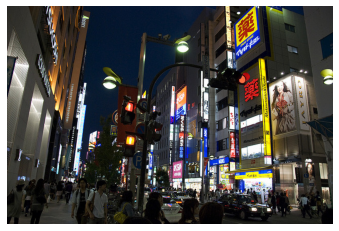

In [18]:
I = io.imread(train_imgs_path + "/COCO_train2014_"+str(imgId).zfill(12)+".jpg")
plt.imshow(I)
plt.axis('off')
plt.show()

In [19]:
# question = "What can be seen in this image?"

# "annotations": [{"question_type": "describe image", "multiple_choice_answer": "down", "answers": [], "image_id": 262148, "answer_type": "caption", "question_id": question_id}]
# annotation{
# "question_id" : int,
# "image_id" : int,
# "question_type" : str,
# "answer_type" : str,
# "answers" : [answer],
# "multiple_choice_answer" : str
# }